### Basic Imports

In [ ]:
import os # Interacting with operating system, used for making folders
import numpy as np # numbers and math
import pandas as pd # dataframes and table operations
from tqdm import tqdm # Progress bars on for loops
from glob import glob # For reading folder/file architecture
import matplotlib.pyplot as plt # For plotting visualizations

### Mounting Drive and Setting Data Directory

Please update the folder path to be your folder {Mohammed or Mutwali}

In [ ]:
from google.colab import drive
drive.mount('/drive')
folder_path = '/drive/Shareddrives/Mohammed ML Training/Image Classification/Mohammed/' # CHANGE YOUR NAME HERE {Mohammed | Mutwali}
if not os.path.exists(folder_path): # Creating the folder if it doesn't already exist
  os.mkdir(folder_path)

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


### Introduction

This is the Image Classification training notebook. Working through this notebook will give you the basic experience needed to download and prepare a dataset for model development.

The introduction has been placed below the above two blocks to allow for easy imports of the import relevant packages and setting the data directory before jumping down to model development after completing the initial data pull and cleaning.

### Downloading Data

In [ ]:
## We will be using the tensorflow_datasets package to download our package
# Importing Dataset package
import tensorflow_datasets as tfds
# List all available datasets
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [ ]:
# Load the data into a variable, note the variable is of type TensorFlow Dataset 
# We specify the download directory with data_dir
ds = tfds.load('cats_vs_dogs', split='train', data_dir=folder_path, shuffle_files=True, as_supervised=True, download=True)
print('Dataset Variable Type: ', type(ds))

Dataset Variable Type:  <class 'tensorflow.python.data.ops.dataset_ops._OptionsDataset'>


### Displaying the data

In [ ]:
## In order to display an image sample we should use the standard Python Image Library (PIL) package
# Import PIL package
import PIL

# Select a sample and convert it to a numpy iterator
sample = ds.take(1)
sample = sample.as_numpy_iterator()

# We must pull from an iterator, this is a python issue. 
img_arr, img_label = next(sample)

# Let's examine the contents of our first sample
print(f'Image array shape: {img_arr.shape}\nLabel content: {img_label}')

Image array shape: (500, 388, 3)
Label content: 0


In [ ]:
# Let's create a mapping so that our labels are readable
label_map = {0:'Cat', 1:'Dog'}
print(f'Label Content: {label_map[img_label]}')

Label Content: Cat


Label: Cat


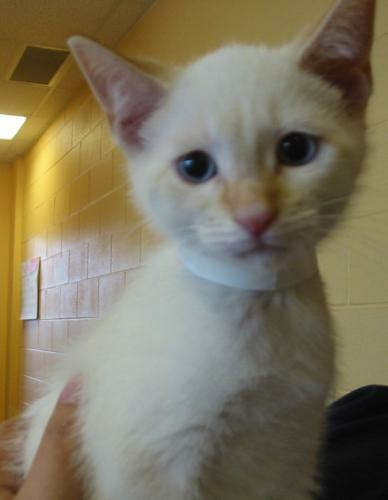

In [ ]:
# Convert image to PIL Image using PIL.Image.fromarray 
img = PIL.Image.fromarray(img_arr)

# Display the image with its label
print(f'Label: {label_map[img_label]}')
img

### Saving the Data into Folders

In [ ]:
## We will have to place the images in folders, the dataset may not fit in RAM
# Create the folders that will hold the images
data_path = folder_path + 'data/'
os.mkdir(data_path) # Data folder
[os.mkdir(data_path + l) for l in label_map.values()] # Class folders

In [ ]:
# Retrieve 3000 samples data and save into folders
num_samples = 3000
img_size = (256,256)
ds_iter = ds.take(num_samples).as_numpy_iterator() # Select the first num_samples items and convert them into numpy arrays in an iterator 
for i, sample in tqdm(enumerate(ds_iter), total=num_samples): # For each sample in the iterator
  x,y = sample # Seperate image and label
  x = PIL.Image.fromarray(x) # Convert image to PIL Image
  x = x.resize(img_size) # Resizing the image
  x.save(data_path + f'{label_map[y]}/{i}.png') # Save image in correct folder

print(f'\nNumber of Samples: {num_samples}\nShape of the last image: {np.array(x).shape}')

100%|██████████| 3000/3000 [02:28<00:00, 20.25it/s]


Number of Samples: 3000
Shape of the last image: (256, 256, 3)


### Examining our Data and Creating an Info DataFrame

In [ ]:
## Now that we have the images in the folders, we can get a distribution of our labels
# We will use the glob module to select all png files within the data folder
image_files = glob(data_path + '*/*.png') # Look in any folder within data for any png files
print(image_files[:5])

['/drive/Shareddrives/Mohammed ML Training/Image Classification/Galal/data/Cat/2.png', '/drive/Shareddrives/Mohammed ML Training/Image Classification/Galal/data/Cat/6.png', '/drive/Shareddrives/Mohammed ML Training/Image Classification/Galal/data/Cat/7.png', '/drive/Shareddrives/Mohammed ML Training/Image Classification/Galal/data/Cat/11.png', '/drive/Shareddrives/Mohammed ML Training/Image Classification/Galal/data/Cat/12.png']


In [ ]:
# I find the easiest way to create columns of data is with pandas dataframes

df = pd.DataFrame(image_files, columns=['img_path']) # Create a dataframe with the image paths
df.sample(10) # Let's see 10 random rows

,img_path
956,/drive/Shareddrives/Mohammed ML Training/Image...
2958,/drive/Shareddrives/Mohammed ML Training/Image...
2606,/drive/Shareddrives/Mohammed ML Training/Image...
883,/drive/Shareddrives/Mohammed ML Training/Image...
163,/drive/Shareddrives/Mohammed ML Training/Image...
1028,/drive/Shareddrives/Mohammed ML Training/Image...
2626,/drive/Shareddrives/Mohammed ML Training/Image...
601,/drive/Shareddrives/Mohammed ML Training/Image...
1611,/drive/Shareddrives/Mohammed ML Training/Image...
388,/drive/Shareddrives/Mohammed ML Training/Image...


In [ ]:
# Let's add a column representing the label
# Test on a single sample first
test_img_path = df['img_path'].iloc[0] # Select the image path at the first location
print(test_img_path.split('/'), '\n') # Split the image path on /
print(test_img_path.split('/')[-2]) # 2nd to last value is what we want

['', 'drive', 'Shareddrives', 'Mohammed ML Training', 'Image Classification', 'Galal', 'data', 'Cat', '2.png'] 

Cat


In [ ]:
# Let's define a function that creates the label from the image path
splitter = lambda x: 0 if x.split('/')[-2] == 'Cat' else 1 # return 0 if the selected value is Cat otherwise 1

# Note that this is the same as the below function

# def splitter(x):
#   if x.split('/')[-2] == 'Cat':
#     return 0
#   else:
#     return 1

In [ ]:
# Let's verify the output of our function
print(test_img_path, '\n', splitter(test_img_path))

/drive/Shareddrives/Mohammed ML Training/Image Classification/Galal/data/Cat/2.png 
 0


In [ ]:
# Now let's apply this to the entire dataframe, this is easily done with pandas apply function
df['label'] = df['img_path'].apply(splitter) # Apply the splitter function to each value in 'img_path' 
                                             # and save the new value in column 'label'

df.head(10) # Let's see the first 10 rows

,img_path,label
0,/drive/Shareddrives/Mohammed ML Training/Image...,0
1,/drive/Shareddrives/Mohammed ML Training/Image...,0
2,/drive/Shareddrives/Mohammed ML Training/Image...,0
3,/drive/Shareddrives/Mohammed ML Training/Image...,0
4,/drive/Shareddrives/Mohammed ML Training/Image...,0
5,/drive/Shareddrives/Mohammed ML Training/Image...,0
6,/drive/Shareddrives/Mohammed ML Training/Image...,0
7,/drive/Shareddrives/Mohammed ML Training/Image...,0
8,/drive/Shareddrives/Mohammed ML Training/Image...,0
9,/drive/Shareddrives/Mohammed ML Training/Image...,0


In [ ]:
# So it looks like we have the column prepared, let's count the values
df['label'].value_counts() # Pandas value_counts command

0    1537
1    1463
Name: label, dtype: int64

([<matplotlib.axis.XTick at 0x7f16fc5daa90>,
 [Text(0, 0, 'Cat'), Text(0, 0, 'Dog')])

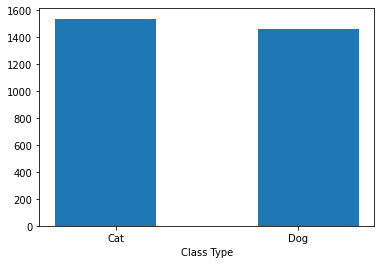

In [ ]:
# It looks like we have about an even spread of each of the label types
plt.hist(df['label'].values, bins=3) # Plot a histogram of labels to see the difference
plt.xlabel('Class Type')
plt.xticks([0.2,0.8],['Cat','Dog'])

In [ ]:
# Now that we've prepared the dataframe of image_path -> label, we can save it off to prevent the repetition of this process
df.to_csv(folder_path + 'data_info.csv', index=False)

### Splitting Data into Train and Test

Now that we have the data ready, let's split it into a test dataset and training dataset. You generally want your test data to be of good size (20-30% of total data) and similar distribution to your total dataset.

In [ ]:
from sklearn.model_selection import train_test_split # This is for splitting the dataset into train and validation

In [ ]:
# Our first step is to import our data info csv
df = pd.read_csv(folder_path + 'data_info.csv')
df.head()

,img_path,label
0,/drive/Shareddrives/Mohammed ML Training/Image...,0
1,/drive/Shareddrives/Mohammed ML Training/Image...,0
2,/drive/Shareddrives/Mohammed ML Training/Image...,0
3,/drive/Shareddrives/Mohammed ML Training/Image...,0
4,/drive/Shareddrives/Mohammed ML Training/Image...,0


In [ ]:
# Let's split off images for testing purposes at the end
# We never want the model to see this data during training

train, test = train_test_split(df['img_path'], 
                               test_size=0.20, # split 20% of the 6000 imgs for testing
                               random_state=42, # set a random state so it can be reproduced
                               stratify=df['label']) # split by label to ensure we have the same 
                                                     # distribution in each set

In [ ]:
# We can now save off training and test dataframes for consistency in future tests
# by using a the .isin function in pandas we can quickly select the correct rows
df['img_path'].isin(train) # .isin functionality

0        True
1       False
2        True
3        True
4        True
        ...  
2995     True
2996    False
2997     True
2998     True
2999     True
Name: img_path, Length: 3000, dtype: bool

In [ ]:
df_train = df[df['img_path'].isin(train)] # Our train dataframe is all the data in the train variable
df_test = df[df['img_path'].isin(test)] # Same for our test dataframe 

In [ ]:
# Let's check the lengths and verify that we have an 18% split
print(f'Train Data Length: {len(df_train)}\nTest Data Length: {len(df_test)}\nTest Data Percent: {(len(df_test)/len(df))*100}%')

Train Data Length: 2400
Test Data Length: 600
Test Data Percent: 20.0%


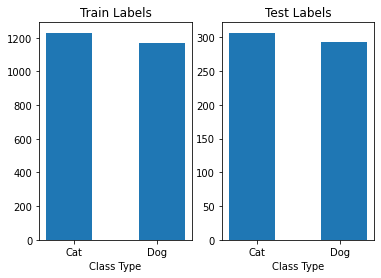

In [ ]:
# Next let's verify that the distributions seem similar as well
plt.subplot(121)
plt.hist(df_train.label, bins=3)
plt.title('Train Labels')
plt.xlabel('Class Type')
plt.xticks([0.2,0.8],['Cat','Dog'])
plt.subplot(122)
plt.hist(df_test.label, bins=3)
plt.title('Test Labels')
plt.xlabel('Class Type')
plt.xticks([0.2,0.8],['Cat','Dog'])
plt.show()

In [ ]:
# Now let's save off the dataframes
df_train.to_csv(folder_path + 'train.csv', index=False)
df_test.to_csv(folder_path + 'test.csv', index=False)